#### Looking for **peptides**...

In [1]:
# Import necessary libraries
import os
import sys
import re
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from itertools import combinations
import plotly.express as px
import plotly.graph_objects as go
from upsetplot import from_indicators, UpSet
from Bio import SeqIO

In [2]:
# Ensure alldark_df is defined
alldark_path = "/Users/ingridmipe/Documents/UM/Browne_Lab/data/PhagocyteGenes/Phagocyte_Gene_Candidates_IMP/all_marker_dark_genes.csv"
alldark_df = pd.read_csv(alldark_path)

alldark_df

,gene,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,X.1,gene_v3,X,...,seed_ortholog,COG_category,Description,Preferred_name,GOs,KEGG_ko,KEGG_Pathway,PFAMs,gene.y,gene_match
0,g-1472,4.840000e-168,4.434267,1.000,0.277,9.680000e-165,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,g-14706,3.770000e-233,9.701888,0.997,0.108,7.540000e-230,8,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,g-13262,5.040000e-169,7.303671,0.996,0.209,1.010000e-165,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,g-13972,4.290000e-172,13.558506,0.996,0.186,8.570000e-169,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,g-3516,1.100000e-172,12.220518,0.996,0.290,2.200000e-169,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,g-5850,7.590000e-10,1.694591,0.097,0.348,1.520000e-06,5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,g-8715,4.770000e-47,1.625087,0.072,0.267,9.540000e-44,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,g-14031,7.080000e-65,3.204459,0.036,0.324,1.420000e-61,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,g-11210,5.880000e-82,4.459029,0.031,0.262,1.180000e-78,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Read FANTASIA results' csv file
fantasia_results = pd.read_csv('/Users/ingridmipe/Documents/UM/Browne_Lab/results/fantasia/experiments/sample_20251017161507_shortseqs/results.csv')
#fantasia_results = pd.read_csv('results/fantasia/experiments/sample_20251003105412/results.csv') 
fantasia_results

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
0,anno1.g10120.t1,GO:0001550,P,IDA,ovarian cumulus expansion,0.1144,Prost-T5,EREG_RAT,Rattus norvegicus (Rat).,Ereg,...,0,0,NaN,17.0588,28.2353,-35,25.2941,170,135,162
1,anno1.g10120.t1,GO:0001556,P,IDA,oocyte maturation,0.1144,Prost-T5,EREG_RAT,Rattus norvegicus (Rat).,Ereg,...,0,0,NaN,17.0588,28.2353,-35,25.2941,170,135,162
2,anno1.g10120.t1,GO:0001825,P,IMP,blastocyst formation,0.0740,Ankh3-Large,T4S1_MOUSE,Mus musculus (Mouse).,Tm4sf1,...,0,0,NaN,16.5179,27.2321,-71,49.5536,224,135,202
3,anno1.g10120.t1,GO:0001894,P,IMP,tissue homeostasis,0.0695,Ankh3-Large,PERP_MOUSE,Mus musculus (Mouse).,Perp {ECO:0000312|MGI:MGI:1929938},...,0,0,NaN,20.5128,29.2308,-33,31.7949,195,135,193
4,anno1.g10120.t1,GO:0002079,C,IDA,inner acrosomal membrane,0.1015,Prost-T5,TM190_MOUSE,Mus musculus (Mouse).,Tmem190,...,0,0,NaN,19.5402,28.1609,-18,27.0115,174,135,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19363,anno2.MSTRG.975.1,GO:1905885,P,IMP,positive regulation of triglyceride transport,0.0478,Prost-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321
19364,anno2.MSTRG.975.1,GO:1905885,P,IMP,positive regulation of triglyceride transport,0.1835,Prot-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321
19365,anno2.MSTRG.975.1,GO:1990595,F,IDA,mast cell secretagogue receptor activity,0.0479,Prost-T5,MRGX2_MOUSE,Mus musculus (Mouse).,Mrgprx2,...,0,0,NaN,16.9118,35.7843,-22,22.5490,408,372,352
19366,anno2.MSTRG.975.1,GO:2000294,P,IMP,positive regulation of defecation,0.0478,Prost-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,1,1,GO:2000292,18.3511,35.9043,3,15.6915,376,372,321


In [4]:
# Defining interesting GO terms related to antimicrobial peptide production
# antimicrobial peptide production GO:0002775; or any child terms: GO:0002784, GO:0002785, GO:0002225, GO:0002776, GO:0002777, GO:0002778, GO:0002781
antimicro_go_terms = [
    'GO:0002775', 'GO:0002784', 'GO:0002785', 'GO:0002225',
    'GO:0002776', 'GO:0002777', 'GO:0002778', 'GO:0002781'
]   

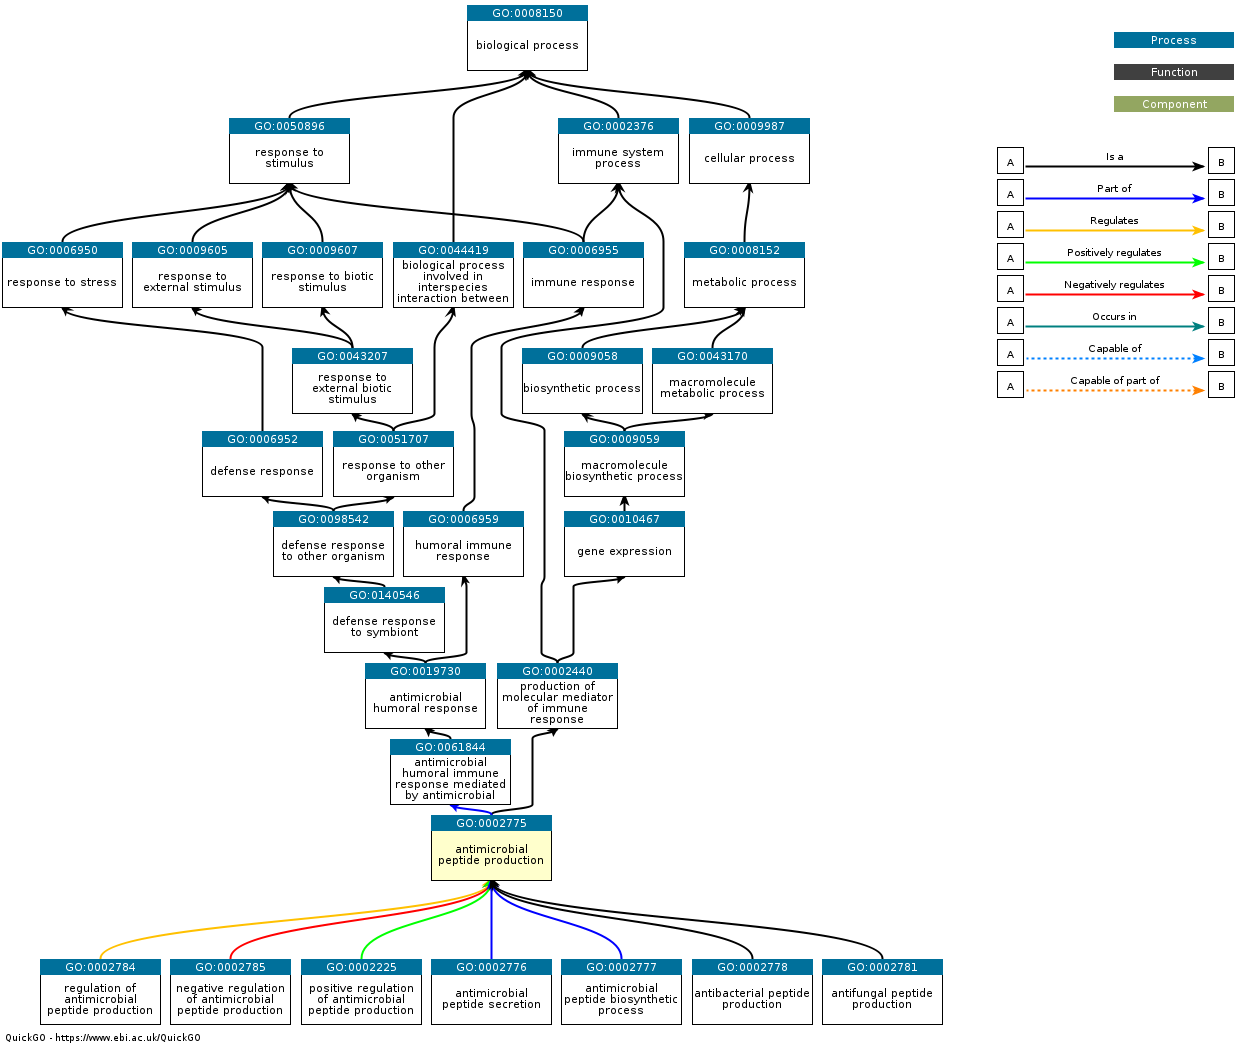

In [5]:
# Filter the dataframe based on the presence of GO terms in the 'go_id' column
filtered_df = fantasia_results[fantasia_results['go_id'].isin(antimicro_go_terms)]
filtered_df

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
3220,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.1261,Ankh3-Large,CAER2_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,11.7647,24.2647,-44,47.7941,136,71,136
3221,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0739,ESM3c,A2BD14_XENLA,Xenopus laevis (African clawed frog).,"pgq.L {ECO:0000313|RefSeq:NP_001091262.1, ECO:...",...,0,0,NaN,20.3883,34.9515,-7,31.0680,103,71,103
3222,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.2072,Prot-T5,CAER2_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,11.7647,24.2647,-44,47.7941,136,71,136
5457,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0125,ESM,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
5458,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0320,ESM3c,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
5459,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.1696,Prot-T5,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
7312,anno1.g2771.t1,GO:0002225,P,IMP,positive regulation of antimicrobial peptide p...,0.1057,Prost-T5,A1ZAQ9_DROME,Drosophila melanogaster (Fruit fly).,"Gbp1 {ECO:0000313|EMBL:AAF57890.1, ECO:0000313...",...,1,1,GO:0002922,15.5405,27.7027,-21,27.0270,148,138,118
8080,anno1.g3267.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0140,ESM,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,18.1818,34.0909,12,19.3182,88,78,81
8081,anno1.g3267.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0395,ESM3c,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,18.1818,34.0909,12,19.3182,88,78,81
9795,anno1.g501.t1,GO:0002776,P,IDA,antimicrobial peptide secretion,0.0136,ESM,CECP3_ASCSU,Ascaris suum (Pig roundworm) (Ascaris lumbrico...,ASCEC-3,...,0,0,NaN,20.2247,31.4607,-12,26.9663,89,80,74


In [12]:
# Creat a new dataframe with the unique values from the column 'accession' in filtered_df. But just the values, no all the other columns.
unique_accessions = filtered_df['accession'].unique()
unique_accessions_df = pd.DataFrame(unique_accessions, columns=['accession'])


# Add a new column called 'antimicrobial_go_id' where you add all the values sepparated by commas appearing in 'go_id' from filtered_df.
go_id_aggregated = filtered_df.groupby('accession')['go_id'].apply(lambda x: ','.join(x.unique())).reset_index()
go_id_aggregated.rename(columns={'go_id': 'antimicrobial_go_id'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(go_id_aggregated, on='accession', how='left')


# Add a new column where you indicate what models predicted go_id for each accession. The models are in the column 'model_name' in filtered_df. Sepparate the values by commas.
model_aggregated = filtered_df.groupby('accession')['model_name'].apply(lambda x: ','.join(x.unique())).reset_index()
model_aggregated.rename(columns={'model_name': 'predicting_models'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(model_aggregated, on='accession', how='left')


# Add a new column called 'reliability_index' where you indicate the value from the column 'reliability_index' in filtered_df for each accession according to the model_name order.
reliability_index_aggregated = filtered_df.groupby('accession')['reliability_index'].apply(lambda x: ','.join(x.astype(str).unique())).reset_index()
unique_accessions_df = unique_accessions_df.merge(reliability_index_aggregated, on='accession', how='left')


# Add a new column called 'go_description' where you indicate the value from the column 'go_description' in filtered_df for each accession according to the go_id order.
go_description_aggregated = filtered_df.groupby('accession')['go_description'].apply(lambda x: ','.join(x.unique())).reset_index()
go_description_aggregated.rename(columns={'go_description': 'go_description'}, inplace=True)
unique_accessions_df = unique_accessions_df.merge(go_description_aggregated, on='accession', how='left')

# Make a merge with short_genes_df by the column 'accession' in unique_accessions_df and 'Transcript_ID' in short_genes_df to add all the columns from short_genes_df to unique_accessions_df.
unique_accessions_df = unique_accessions_df.merge(short_genes_df, left_on='accession', right_on='Transcript_ID', how='left')
unique_accessions_df

,accession,antimicrobial_go_id,predicting_models,reliability_index,go_description,gene,Ocurrences,cluster,Length,Transcript_ID
0,anno1.g12795.t1,GO:0002777,"Ankh3-Large,ESM3c,Prot-T5","0.8739,0.9261,0.7928",antimicrobial peptide biosynthetic process,g_12353,1,7,71,anno1.g12795.t1
1,anno1.g14702.t1,GO:0002777,"ESM,ESM3c,Prot-T5","0.9875,0.968,0.8304",antimicrobial peptide biosynthetic process,g_14203,1,18,85,anno1.g14702.t1
2,anno1.g2771.t1,GO:0002225,Prost-T5,0.8943,positive regulation of antimicrobial peptide p...,g_2673,1,8,138,anno1.g2771.t1
3,anno1.g3267.t1,GO:0002777,"ESM,ESM3c","0.986,0.9605",antimicrobial peptide biosynthetic process,g_3156,2,"16, 5",78,anno1.g3267.t1
4,anno1.g501.t1,GO:0002776,"ESM,ESM3c","0.9864,0.9768",antimicrobial peptide secretion,g_485,3,"2, 11, 14",80,anno1.g501.t1
5,anno1.g6562.t1,GO:0002777,ESM,0.988,antimicrobial peptide biosynthetic process,g_6330,2,"19, 5",68,anno1.g6562.t1
6,anno2.4815_t,GO:0002777,"Ankh3-Large,ESM3c,Prot-T5","0.8784,0.9234,0.7935",antimicrobial peptide biosynthetic process,g_16593,1,9,70,anno2.4815_t
7,anno2.MSTRG.17720.4,GO:0002777,"ESM,Prot-T5","0.974,0.8266",antimicrobial peptide biosynthetic process,g_15707,1,16,253,anno2.MSTRG.17720.4
8,anno2.MSTRG.2722.1,GO:0002777,ESM,0.9854,antimicrobial peptide biosynthetic process,g_15401,1,8,64,anno2.MSTRG.2722.1
9,anno2.MSTRG.5980.1,GO:0002777,Prot-T5,0.7011,antimicrobial peptide biosynthetic process,g_155,1,16,200,anno2.MSTRG.5980.1


In [13]:
# Find anything related to antimicrobial peptides in the FANTASIA results
antimicrobial_peptides_df = fantasia_results[fantasia_results['go_id'].apply(lambda x: any(term in str(x) for term in antimicro_go_terms))]
antimicrobial_peptides_df


,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
3220,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.1261,Ankh3-Large,CAER2_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,11.7647,24.2647,-44,47.7941,136,71,136
3221,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0739,ESM3c,A2BD14_XENLA,Xenopus laevis (African clawed frog).,"pgq.L {ECO:0000313|RefSeq:NP_001091262.1, ECO:...",...,0,0,NaN,20.3883,34.9515,-7,31.0680,103,71,103
3222,anno1.g12795.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.2072,Prot-T5,CAER2_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,11.7647,24.2647,-44,47.7941,136,71,136
5457,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0125,ESM,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
5458,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0320,ESM3c,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
5459,anno1.g14702.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.1696,Prot-T5,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,16.6667,28.4314,-23,37.2549,102,85,81
7312,anno1.g2771.t1,GO:0002225,P,IMP,positive regulation of antimicrobial peptide p...,0.1057,Prost-T5,A1ZAQ9_DROME,Drosophila melanogaster (Fruit fly).,"Gbp1 {ECO:0000313|EMBL:AAF57890.1, ECO:0000313...",...,1,1,GO:0002922,15.5405,27.7027,-21,27.0270,148,138,118
8080,anno1.g3267.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0140,ESM,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,18.1818,34.0909,12,19.3182,88,78,81
8081,anno1.g3267.t1,GO:0002777,P,TAS,antimicrobial peptide biosynthetic process,0.0395,ESM3c,XENO_XENLA,Xenopus laevis (African clawed frog).,NaN,...,0,0,NaN,18.1818,34.0909,12,19.3182,88,78,81
9795,anno1.g501.t1,GO:0002776,P,IDA,antimicrobial peptide secretion,0.0136,ESM,CECP3_ASCSU,Ascaris suum (Pig roundworm) (Ascaris lumbrico...,ASCEC-3,...,0,0,NaN,20.2247,31.4607,-12,26.9663,89,80,74


In [14]:
# Find anything with the word "antimicrobial" or "peptide" in the 'go_description' column
antimicrobial_peptides_desc_df = fantasia_results[fantasia_results['go_description'].str.contains('antimicrobial|peptide', case=False, na=False)]
antimicrobial_peptides_desc_df

,accession,go_id,category,evidence_code,go_description,distance,model_name,protein_id,organism,gene_name,...,collapsed_support,n_collapsed_terms,collapsed_terms,identity,similarity,alignment_score,gaps_percentage,alignment_length,length_query,length_reference
42,anno1.g10120.t1,GO:0043434,P,IEP,response to peptide hormone,0.1144,Prost-T5,EREG_RAT,Rattus norvegicus (Rat).,Ereg,...,0,0,NaN,17.0588,28.2353,-35,25.2941,170,135,162
52,anno1.g10120.t1,GO:0046776,P,IDA,symbiont-mediated suppression of host antigen ...,0.0699,Ankh3-Large,US06_HCMVA,Human cytomegalovirus (strain AD169) (HHV-5) (...,US6,...,0,0,NaN,16.3158,22.6316,-50,32.6316,190,135,183
886,anno1.g10820.t1,GO:0042277,F,IDA,peptide binding,0.0710,Ankh3-Large,CRHBP_RAT,Rattus norvegicus (Rat).,Crhbp,...,0,0,NaN,13.3333,21.8182,-131,48.7879,330,177,322
887,anno1.g10820.t1,GO:0042277,F,IDA,peptide binding,0.1206,Prost-T5,CRHBP_RAT,Rattus norvegicus (Rat).,Crhbp,...,0,0,NaN,13.3333,21.8182,-131,48.7879,330,177,322
969,anno1.g10988.t1,GO:0006465,P,IDA,signal peptide processing,0.3347,Prot-T5,CLN5_HUMAN,Homo sapiens (Human).,CLN5,...,0,0,NaN,16.3043,29.8913,-84,30.9783,368,264,358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19310,anno2.MSTRG.975.1,GO:0007218,P,IDA,neuropeptide signaling pathway,0.0478,Prost-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321
19311,anno2.MSTRG.975.1,GO:0007218,P,IDA,neuropeptide signaling pathway,0.1835,Prot-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321
19313,anno2.MSTRG.975.1,GO:0008188,F,IC,neuropeptide receptor activity,0.0478,Prost-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321
19314,anno2.MSTRG.975.1,GO:0008188,F,IC,neuropeptide receptor activity,0.1835,Prot-T5,AEX2_CAEEL,Caenorhabditis elegans.,aex-2 {ECO:0000312|WormBase:T14B1.2},...,0,0,NaN,18.3511,35.9043,3,15.6915,376,372,321


In [15]:
# How many models predicted each GO term related to antimicrobial peptides for each accession?
model_counts = filtered_df.groupby(['accession', 'go_id'])['model_name'].nunique().reset_index()
model_counts.rename(columns={'model_name': 'model_count'}, inplace=True)
model_counts


,accession,go_id,model_count
0,anno1.g12795.t1,GO:0002777,3
1,anno1.g14702.t1,GO:0002777,3
2,anno1.g2771.t1,GO:0002225,1
3,anno1.g3267.t1,GO:0002777,2
4,anno1.g501.t1,GO:0002776,2
5,anno1.g6562.t1,GO:0002777,1
6,anno2.4815_t,GO:0002777,3
7,anno2.MSTRG.17720.4,GO:0002777,2
8,anno2.MSTRG.2722.1,GO:0002777,1
9,anno2.MSTRG.5980.1,GO:0002777,1


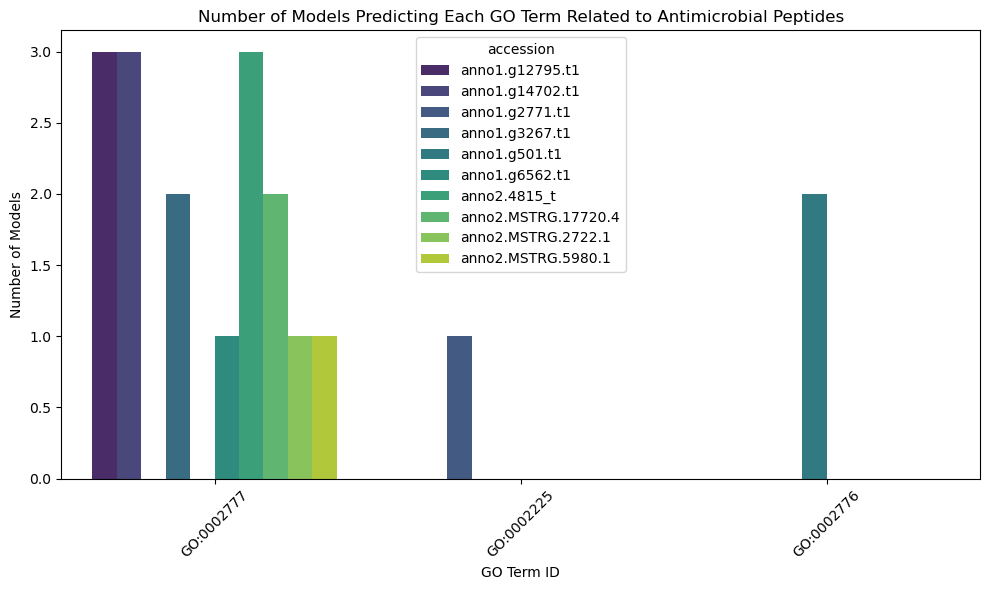

In [17]:
# Plot a barplot showing the number of models predicting each GO term related to antimicrobial peptides for each accession.
plt.figure(figsize=(10, 6))
sns.barplot(data=model_counts, x='go_id', y='model_count', hue='accession', palette='viridis')
plt.title('Number of Models Predicting Each GO Term Related to Antimicrobial Peptides')
plt.xlabel('GO Term ID')
plt.ylabel('Number of Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###### Here we realize that before running FANTASIA, we filter almost all the short sequences we had. So, we decided to send another FANTASIA run for all the sequences that have =<500 aa's in the `all_marker_dark_genes.csv` dataset.

In [7]:
# Haz un nuevo dataframe con los valores únicos de la columna 'gene'. Luego, crea otra columna 'Ocurrencias' que cuente cuántas veces aparece cada gen en la columna 'gene' del dataframe original alldark_df.
unique_alldark_df = alldark_df[['gene']].drop_duplicates().reset_index(drop=True)
unique_alldark_df['Ocurrences'] = unique_alldark_df['gene'].apply(lambda x: alldark_df[alldark_df['gene'] == x]['gene'].count())
unique_alldark_df

# Crea una nueva columna 'Cluster' en donde aparezca en que cluster o clusteres está cada gen, según la información del dataframe original alldark_df.
def get_clusters(gene):
    clusters = alldark_df[alldark_df['gene'] == gene]['cluster'].unique()
    return ', '.join(map(str, clusters))
unique_alldark_df['cluster'] = unique_alldark_df['gene'].apply(get_clusters)
unique_alldark_df

# Change '-' to '_' in the 'gene' column of the unique_alldark_df dataframe.
unique_alldark_df['gene'] = unique_alldark_df['gene'].str.replace('-', '_')
unique_alldark_df


,gene,Ocurrences,cluster
0,g_1472,3,"13, 20, 15"
1,g_14706,1,8
2,g_13262,1,13
3,g_13972,1,13
4,g_3516,1,13
...,...,...,...
329,g_1200,2,"5, 18"
330,g_5437,2,"5, 15"
331,g_8419,3,"16, 9, 5"
332,g_8715,2,"7, 11"


In [8]:
# Define paths and read input files
proteome_info_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/Gen-Proteomes/Mle_2023_one_seq_proteome.csv'
proteome_fasta_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/Gen-Proteomes/Mle_2023_one_seq_proteome.fasta'

proteome_info = pd.read_csv(proteome_info_path)
proteome_sequences = list(SeqIO.parse(proteome_fasta_path, "fasta"))

proteome_info

,Gene_ID,Num_Transcripts,Transcripts_IDs,Transcript_Lengths,Difference_Length,Longest_Transcript,Length
0,g_16414,1,['anno2.3794_t'],[169],0,anno2.3794_t,169
1,g_666,1,['anno1.g689.t1'],[208],0,anno1.g689.t1,208
2,g_667,1,['anno1.g690.t1'],[255],0,anno1.g690.t1,255
3,g_16419,1,['anno2.3801_t'],[193],0,anno2.3801_t,193
4,g_668,2,"['anno1.g691.t1', 'anno2.MSTRG.14.2']","[715, 654]",61,anno1.g691.t1,715
...,...,...,...,...,...,...,...
15540,g_11239,2,"['anno1.g11650.t1', 'anno1.g11650.t2']","[149, 134]",15,anno1.g11650.t1,149
15541,g_11240,3,"['anno1.g11651.t1', 'anno1.g11651.t2', 'anno2....","[2514, 2516, 2556]",42,anno2.MSTRG.20491.3,2556
15542,g_11241,1,['anno1.g11652.t1'],[402],0,anno1.g11652.t1,402
15543,g_16809,1,['anno2.6432_t'],[144],0,anno2.6432_t,144


In [9]:
# Add a column called 'length' to unique_alldark_df with the length of each gene sequence from proteome_info. Match by 'gene' and 'Gene_ID' columns.
def get_gene_length(gene):
    length = proteome_info[proteome_info['Gene_ID'] == gene]['Length']
    if not length.empty:
        return length.values[0]
    return np.nan
unique_alldark_df['Length'] = unique_alldark_df['gene'].apply(get_gene_length)
unique_alldark_df


,gene,Ocurrences,cluster,Length
0,g_1472,3,"13, 20, 15",187
1,g_14706,1,8,173
2,g_13262,1,13,195
3,g_13972,1,13,152
4,g_3516,1,13,207
...,...,...,...,...
329,g_1200,2,"5, 18",101
330,g_5437,2,"5, 15",342
331,g_8419,3,"16, 9, 5",173
332,g_8715,2,"7, 11",200


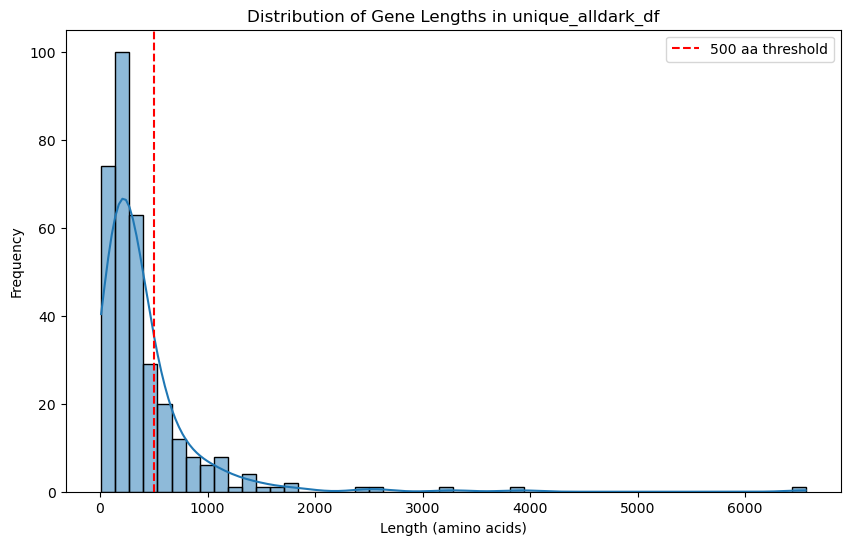

In [10]:
# How many genes have length <= 500 amino acids?
short_genes_df = unique_alldark_df[unique_alldark_df['Length'] <= 500]
short_genes_df

# Plot a histogram of the lengths of the genes in unique_alldark_df
plt.figure(figsize=(10, 6))
sns.histplot(unique_alldark_df['Length'].dropna(), bins=50, kde=True)
plt.title('Distribution of Gene Lengths in unique_alldark_df')
plt.xlabel('Length (amino acids)')
plt.ylabel('Frequency')
plt.axvline(x=500, color='red', linestyle='--', label='500 aa threshold')
plt.legend()
plt.show()  

In [11]:
# Add a column named 'Transcript_ID' to short_genes_df with the corresponding Longest_Transcript from proteome_info. Match by 'gene' and 'Gene_ID' columns.
def get_transcript_id(gene):
    transcript_id = proteome_info[proteome_info['Gene_ID'] == gene]['Longest_Transcript']
    if not transcript_id.empty:
        return transcript_id.values[0]
    return np.nan

short_genes_df['Transcript_ID'] = short_genes_df['gene'].apply(get_transcript_id)   
short_genes_df

/var/folders/6v/mnv5b0q920s9bt80chkndc740000gn/T/ipykernel_2062/3516619149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  short_genes_df['Transcript_ID'] = short_genes_df['gene'].apply(get_transcript_id)


,gene,Ocurrences,cluster,Length,Transcript_ID
0,g_1472,3,"13, 20, 15",187,anno1.g1528.t1
1,g_14706,1,8,173,anno1.g15224.t1
2,g_13262,1,13,195,anno2.MSTRG.14836.2
3,g_13972,1,13,152,anno1.g14463.t1
4,g_3516,1,13,207,anno1.g3645.t1
...,...,...,...,...,...
329,g_1200,2,"5, 18",101,anno1.g1244.t1
330,g_5437,2,"5, 15",342,anno1.g5638.t1
331,g_8419,3,"16, 9, 5",173,anno1.g8743.t1
332,g_8715,2,"7, 11",200,anno2.MSTRG.18825.1


In [ ]:
# Make a fasta file with the sequences of short_genes_df. Use the Transcript_ID column to match the sequences.
short_transcript_ids = set(short_genes_df['Transcript_ID'])
short_transcript_sequences = [record for record in proteome_sequences if record.id in short_transcript_ids]

# Save the short transcript sequences to a new fasta file
short_transcripts_fasta_path = '/Users/ingridmipe/Documents/UM/Browne_Lab/data/Phagocyte_Peptides/short_dark_genes_phagocyte.fasta'
SeqIO.write(short_transcript_sequences, short_transcripts_fasta_path, "fasta")


264